In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import get_raw_data
import get_preprocessing_data
import analysis_method
import itertools

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pv_list = ["0102", "1701", "1702", "0111", "0330", "0331", "0332", "0333", "0101", "0107", "0110", "5501"]
#["0102"(가구주와의 관계), "1701"(근로소득 유무), "1702"(총 연간근로소득), "0111"(학력졸업여부), "0330"(업종8차),
# "0331"(업종9차), "0332"(직종8차), "0333"(직종9차), "0101"(성별), "0107"(만나이), "0110"(학력학교), "5501"(혼인상태)]
hv_list = ["0150", "1406", "2102", "2134", "2136", " 2138", "2140", "2142", "2152", "2153", "2155",
           "2156", "2157", "2158", "2159", "2160", "2182", "2183", "2184", "2185", "2186", "2187",
           "2189", "2190", "2191"]
income_code_list = ["2102", "2134", "2136", " 2138", "2140", "2142", "2152", "2153", "2155", "2156",
                    "2157", "2158", "2159", "2160", "2182", "2183", "2184", "2185", "2186", "2187",
                    "2189", "2190", "2191"]

cpi_data = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\CPI.xls").loc[0, :]
cpi_data_index = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\CPI.xls", dtype="str").loc[14, :].values[1:]
cpi_data = pd.Series(cpi_data.values[1:], dtype="float")
cpi_data.name = "CPI"
cpi_data.index = cpi_data_index

industry_8 = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\국내데이터_산업분류.xlsx", sheet_name="8차")
industry_large = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\국내데이터_산업분류.xlsx", sheet_name="대분류")

data_num = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]

cpi_multiple = get_preprocessing_data.get_cpi_multi(cpi_data, data_num)

data_dict = {}
for i in data_num:
    h_path = "C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\h_data\\h_" + i + ".pickle"
    p_path = "C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\p_data\\p_" + i + ".pickle"

    h_data = pd.read_pickle(h_path)
    p_data = pd.read_pickle(p_path)

    raw_hdata = get_raw_data.get_hv_data(h_data, hv_list, i)
    raw_pdata = get_raw_data.get_pv_data(p_data, pv_list, i)
    
    fin_p_data = get_preprocessing_data.get_fin_personal(raw_pdata, industry_8, industry_large)
    income_data = get_preprocessing_data.get_income_data(fin_p_data.index, raw_hdata)

    fin_x_value = get_preprocessing_data.get_final_xvalue(raw_hdata, fin_p_data)
    fin_y_value = get_preprocessing_data.get_final_yvalue(income_data, cpi_multiple[i])

    finally_preprocessed_data = get_preprocessing_data.get_total_data(fin_y_value, fin_x_value)

    data_dict[i] = finally_preprocessed_data

C:\Users\JeayongYu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_df = pd.DataFrame()
for i in data_dict.keys():
    data_df = pd.concat([data_df, data_dict[i]])

In [3]:
data_df

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
8.0,2329.162537,1,2,26,0.0,employ,"전문, 과학 및 기술 서비스업 (70 ~ 73)",1.0,1.0
21.0,1940.968781,1,1,25,1.0,employ,도매 및 소매업 (45~47),3.0,0.0
25.0,5822.906343,1,1,37,1.0,unemploy,도매 및 소매업 (45~47),4.0,0.0
30.0,1940.968781,1,3,30,0.0,unemploy,숙박 및 음식점업 (55 ~ 56),1.0,0.0
32.0,2911.453171,1,1,59,1.0,unemploy,도매 및 소매업 (45~47),4.0,1.0
...,...,...,...,...,...,...,...,...,...
110213.0,6840.000000,1,2,37,1.0,employ,보건업 및 사회복지 서비스업(86~87),3.0,0.0
110235.0,6560.000000,1,1,41,1.0,unemploy,건설업 (41 ~ 42),3.0,1.0
110239.0,7970.000000,1,3,35,1.0,employ,"출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)",2.0,0.0


In [4]:
jobtype_list = data_df["jobtype"].value_counts().index
jobtype_list

Index(['employ', 'unemploy'], dtype='object')

In [5]:
statistic_df = pd.DataFrame()
for i in range(3):
    temp_df = pd.DataFrame(data_df.groupby(["0110", "jobtype"]).size()).loc[1+i, :].loc[jobtype_list]
    statistic_df = pd.concat([statistic_df, temp_df], axis=1)
    
statistic_df.columns = ["high school", "college", "university"]
statistic_df.index = ["employ", "unemploy"]

statistic_df = pd.concat([statistic_df.T, pd.Series(statistic_df.sum(), name="Total")], axis=1).T
statistic_df = pd.concat([statistic_df, pd.Series(statistic_df.sum(axis=1), name="Total")], axis=1)
statistic_df

,high school,college,university,Total
employ,15759,5676,12921,34356
unemploy,9458,1763,3809,15030
Total,25217,7439,16730,49386


_________________
### 고등학교 졸업 학력 데이터 & 임금 근로자

In [6]:
data_df.groupby(["0110", "jobtype"]).get_group((1, "employ"))

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
21.0,1940.968781,1,1,25,1.0,employ,도매 및 소매업 (45~47),3.0,0.0
59.0,4464.228196,1,1,68,1.0,employ,제조업 (10 ~ 33),5.0,1.0
68.0,2329.162537,1,1,56,1.0,employ,"하수 · 폐기물 처리, 원료재생 및 환경복 원업 (37 ~ 39)",4.0,1.0
74.0,3299.646928,1,1,42,1.0,employ,도매 및 소매업 (45~47),4.0,0.0
77.0,2911.453171,1,1,44,1.0,employ,도매 및 소매업 (45~47),4.0,0.0
...,...,...,...,...,...,...,...,...,...
110252.0,2760.000000,1,1,24,0.0,employ,제조업 (10 ~ 33),1.0,0.0
110064.0,5300.000000,1,1,43,1.0,employ,도매 및 소매업 (45~47),4.0,1.0
110085.0,6140.000000,1,1,35,1.0,employ,제조업 (10 ~ 33),4.0,0.0


_________________
### 대학 이상 졸업 학력 데이터 & 자영업자


In [7]:
data_df.groupby(["0110", "jobtype"]).get_group((3, "unemploy"))

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
30.0,1940.968781,1,3,30,0.0,unemploy,숙박 및 음식점업 (55 ~ 56),1.0,0.0
46.0,5822.906343,1,3,40,1.0,unemploy,"출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)",5.0,1.0
83.0,12616.297076,1,3,50,1.0,unemploy,"하수 · 폐기물 처리, 원료재생 및 환경복 원업 (37 ~ 39)",5.0,1.0
84.0,3940.166625,1,3,35,1.0,unemploy,보건업 및 사회복지 서비스업(86~87),4.0,0.0
160.0,2911.453171,1,3,46,1.0,unemploy,교육 서비스업(85),4.0,0.0
...,...,...,...,...,...,...,...,...,...
101170.0,3150.000000,1,3,57,1.0,unemploy,"협회 및 단체, 수리 및 기타 개인 서비스 업(94~96)",4.0,0.0
101184.0,8400.000000,1,3,56,1.0,unemploy,도매 및 소매업 (45~47),4.0,1.0
101218.0,12240.000000,1,3,54,1.0,unemploy,숙박 및 음식점업 (55 ~ 56),5.0,1.0


_______________________________


### 각 Educated group별 Fixed effects regression results

In [8]:
start_list = [22, 24, 26]
edu_list = ["high_school", "college", "university"]

fer_results_dict_top = {}
for i in range(3):
    fer_results_dict = {}
    for j in jobtype_list:
        temp_edu = data_df.groupby(["0110", "jobtype"]).get_group((i+1, j))
        temp_edu = get_preprocessing_data.get_agecut_data(temp_edu, start_list[i])

        #print("-----------------------------------------------------------")
        #print(edu_list[i], j)
        fer_results = analysis_method.fe_regression_sol(temp_edu, False)

        fer_results_dict[j] = fer_results 
        
    fer_results_dict_top[edu_list[i]] = fer_results_dict

In [9]:
columns_name = ["parames", "pvalue"]
pd.DataFrame.from_dict({(i, j, k): fer_results_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]]
                        for i in fer_results_dict_top.keys()
                        for j in fer_results_dict_top[i].keys()
                        for k in columns_name}, orient="columns")

high_school                             college                    \
                employ          unemploy            employ          unemploy   
               parames  pvalue   parames  pvalue   parames  pvalue   parames   
family_num    0.058637  0.0000  0.056456  0.0000  0.056473  0.0000  0.043150   
intercept     7.492620  0.0000  7.617263  0.0000  7.789935  0.0000  7.775529   
marriage      0.330761  0.0000  0.281217  0.0000  0.250728  0.0000  0.274288   
22           -0.410524  0.0014       NaN     NaN       NaN     NaN       NaN   
23           -0.161728  0.1518       NaN     NaN       NaN     NaN       NaN   
24           -0.296431  0.0007  0.887012  0.1760 -0.364400  0.0096 -0.578569   
25           -0.021273  0.7684  0.052110  0.8738 -0.305175  0.0005 -3.077740   
26           -0.169190  0.0059 -0.489980  0.0054 -0.189060  0.0056 -0.211892   
27           -0.101594  0.0449 -0.043142  0.7817 -0.205616  0.0002  0.317503   
28           -0.039877  0.3433 -0.099664  0.4613 -0.195759  0.0000  0.215719   
29           -0.018268  0.6327  0.120573  0.2269 -0.067369  0.0930 -0.034956   
30           -0.020645  0.5366 -0.009483  0.9073 -0.017324  0.6292 -0.137461   
31            0.000680  0.9821 -0.026196  0.7158  0.010196  0.7648  0.164058   
32            0.006620  0.8133  0.044527  0.5047  0.036396  0.2595 -0.011806   
33            0.059841  0.0278  0.072860  0.2574  0.040570  0.1913  0.178191   
34            0.054538  0.0391  0.044014  0.4654  0.083376  0.0070 -0.029259   
35            0.083762  0.0011  0.131107  0.0205  0.129465  0.0000  0.280293   
36            0.092632  0.0002  0.111162  0.0375  0.109161  0.0004  0.221070   
37            0.106554  0.0000  0.172944  0.0005  0.131975  0.0000  0.129717   
38            0.091555  0.0001  0.143668  0.0022  0.160545  0.0000  0.261687   
39            0.124668  0.0000  0.079155  0.0802  0.180736  0.0000  0.239621   
40            0.191080  0.0000  0.155532  0.0005  0.155454  0.0000  0.162678   
41            0.163309  0.0000  0.154974  0.0003  0.184529  0.0000  0.145012   
42            0.176058  0.0000  0.144118  0.0008  0.200130  0.0000  0.187605   
43            0.218038  0.0000  0.180428  0.0000  0.211858  0.0000  0.391486   
44            0.234199  0.0000  0.206494  0.0000  0.229904  0.0000  0.338988   
45            0.260038  0.0000  0.217390  0.0000  0.261365  0.0000  0.331666   
46            0.267216  0.0000  0.226413  0.0000  0.347532  0.0000  0.339141   
47            0.293656  0.0000  0.256690  0.0000  0.310335  0.0000  0.300718   
48            0.278299  0.0000  0.327361  0.0000  0.265715  0.0000  0.241302   
49            0.280620  0.0000  0.283963  0.0000  0.229264  0.0000  0.373402   
50            0.307327  0.0000  0.291659  0.0000  0.278711  0.0000  0.343976   
51            0.349498  0.0000  0.282407  0.0000  0.303439  0.0000  0.355013   
52            0.371429  0.0000  0.250637  0.0000  0.361264  0.0000  0.458826   
53            0.399167  0.0000  0.295498  0.0000  0.375570  0.0000  0.397669   
54            0.403273  0.0000  0.368478  0.0000  0.282884  0.0000  0.530020   
55            0.447831  0.0000  0.324974  0.0000  0.456209  0.0000  0.421107   
56            0.484515  0.0000  0.336104  0.0000  0.486441  0.0000  0.456341   
57            0.487359  0.0000  0.299839  0.0000  0.397446  0.0000  0.759672   
58            0.479476  0.0000  0.317459  0.0000  0.428851  0.0000  0.680294   
59            0.432327  0.0000  0.372945  0.0000  0.417786  0.0000  0.561850   
60            0.380798  0.0000  0.276750  0.0000  0.406399  0.0001  0.701031   
61            0.355712  0.0000  0.251942  0.0000  0.400782  0.0008  0.481371   
62            0.315587  0.0000  0.273822  0.0000  0.422316  0.0008  0.713466   
63            0.297244  0.0000  0.156437  0.0059  0.387415  0.0298  0.128309   
64            0.237244  0.0000  0.174283  0.0031  0.450617  0.0074  0.048407   

                   university                            
                       employ   

_______________________________


### 각 Educated group별 Labor income proﬁles (age dummies and ﬁtted 3rd-order polynomials)

In [10]:
fitting_result_dict_top = {}
for j in fer_results_dict_top.keys():
    fitting_result_dict = {}
    for i in fer_results_dict.keys():
        fitting_result_dict[i] = analysis_method.fitting_polynomial(fer_results_dict_top[j][i], 3, False)

        #fitting_result_dict[i][0].plot(figsize=(10, 5))
        #plt.show()
    fitting_result_dict_top[j] = fitting_result_dict

In [11]:
columns_name = ["parames", "pvalue"]
pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]+1]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in columns_name}, orient="columns")

high_school                                 college                \
                employ            unemploy              employ                 
               parames    pvalue   parames    pvalue   parames        pvalue   
intercept    -0.390035  0.375261  3.981756  0.011540 -2.649108  9.455763e-08   
age^1/10^0   -0.013523  0.685361 -0.304786  0.008795  0.151044  9.622157e-06   
age^2/10^1    0.012117  0.138475  0.074977  0.006335 -0.026576  4.732314e-04   
age^3/10^2   -0.001289  0.043819 -0.005740  0.005714  0.001650  3.209095e-03   

                               university                                
            unemploy               employ            unemploy            
             parames    pvalue    parames    pvalue   parames    pvalue  
intercept  -9.291528  0.034523  -1.868544  0.031839 -3.200056  0.019382  
age^1/10^0  0.578539  0.071112   0.066751  0.269226  0.182626  0.053488  
age^2/10^1 -0.114316  0.126876  -0.000764  0.955538 -0.031862  0.131539  
age^3/10^2  0.007483  0.184078  -0.000710  0.484941  0.001874  0.222042

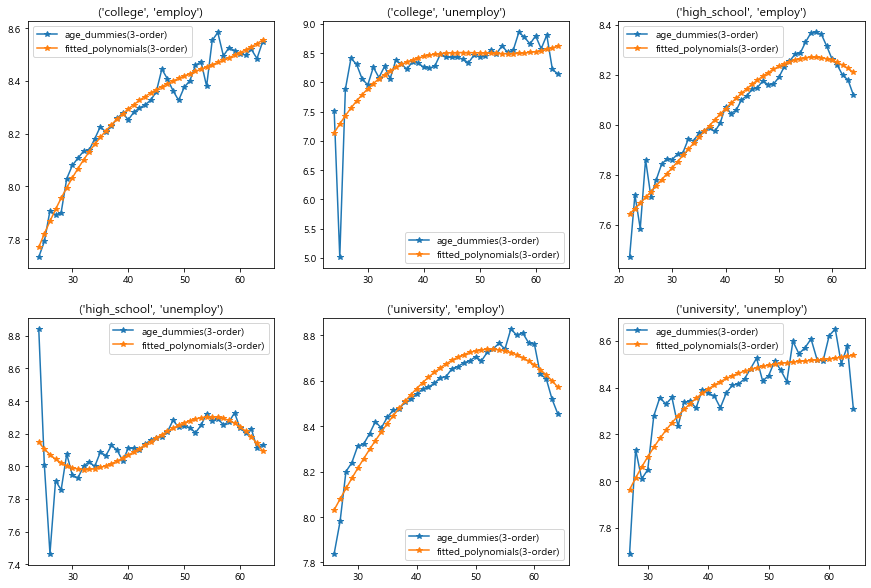

In [12]:
polynomials_plot = pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][0].loc[:, k]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in fitting_result_dict_top[i][j][0].columns}, orient="columns")

subplot_1 = len(polynomials_plot.columns.levels[0])
subplot_2 = len(polynomials_plot.columns.levels[1])

col_combination = list(itertools.product(*polynomials_plot.columns.levels[0:2]))

plt.figure(figsize=(15, 10))
for i in range(subplot_1*subplot_2):
    plt.subplot(subplot_2, subplot_1, i+1)
    plt.plot(polynomials_plot[col_combination[i][0]][col_combination[i][1]], "*-")
    plt.title(col_combination[i])
    plt.legend(polynomials_plot[col_combination[i][0]][col_combination[i][1]].columns)
    
plt.show()

_______________________________


### 각 Educated group별 Labor income proﬁles (age dummies and ﬁtted 5th-order polynomials)

In [13]:
fitting_result_dict_top = {}
for j in fer_results_dict_top.keys():
    fitting_result_dict = {}
    for i in fer_results_dict.keys():
        fitting_result_dict[i] = analysis_method.fitting_polynomial(fer_results_dict_top[j][i], 5, False)

        #fitting_result_dict[i][0].plot(figsize=(10, 5))
        #plt.show()
    fitting_result_dict_top[j] = fitting_result_dict

In [14]:
columns_name = ["parames", "pvalue"]
pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]+1]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in columns_name}, orient="columns")

high_school                                  college            \
                employ             unemploy              employ             
               parames    pvalue    parames    pvalue   parames    pvalue   
intercept    -6.572702  0.125296  75.237062  0.001406 -5.801272  0.333415   
age^1/10^0    0.610177  0.269953  -9.080132  0.001952  0.434288  0.560708   
age^2/10^1   -0.206374  0.457262   4.269821  0.002674 -0.108169  0.765706   
age^3/10^2    0.028428  0.674976  -0.980443  0.003570  0.007530  0.930377   
age^4/10^3   -0.000773  0.923664   0.110328  0.004576  0.000851  0.932185   
age^5/10^4   -0.000086  0.817608  -0.004878  0.005626 -0.000105  0.816830   

                                university                                 
             unemploy               employ             unemploy            
              parames    pvalue    parames    pvalue    parames    pvalue  
intercept  -69.531113  0.288083 -28.828527  0.000307 -41.845048  0.053205  
age^1/10^0   7.126993  0.382425   2.882762  0.002057   4.261876  0.093952  
age^2/10^1  -2.798510  0.480573  -1.114733  0.009751  -1.683659  0.151685  
age^3/10^2   0.522735  0.578660   0.206256  0.035011   0.321787  0.226620  
age^4/10^3  -0.045747  0.675027  -0.017793  0.103069  -0.029511  0.319226  
age^5/10^4   0.001462  0.767737   0.000548  0.253076   0.001029  0.427612

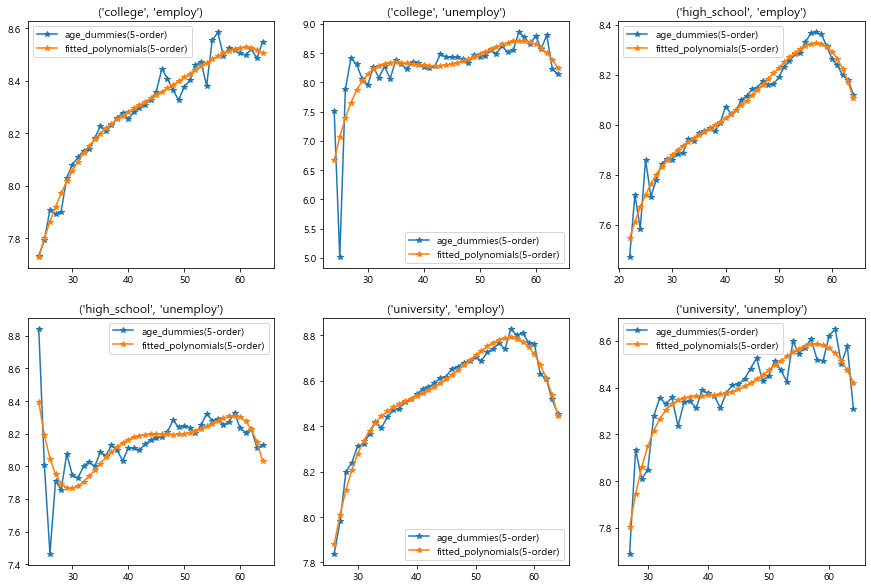

In [15]:
polynomials_plot = pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][0].loc[:, k]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in fitting_result_dict_top[i][j][0].columns}, orient="columns")

subplot_1 = len(polynomials_plot.columns.levels[0])
subplot_2 = len(polynomials_plot.columns.levels[1])

col_combination = list(itertools.product(*polynomials_plot.columns.levels[0:2]))

plt.figure(figsize=(15, 10))
for i in range(subplot_1*subplot_2):
    plt.subplot(subplot_2, subplot_1, i+1)
    plt.plot(polynomials_plot[col_combination[i][0]][col_combination[i][1]], "*-")
    plt.title(col_combination[i])
    plt.legend(polynomials_plot[col_combination[i][0]][col_combination[i][1]].columns)
    
plt.show()